In [1]:
import hdf5plugin
import h5py
import cupy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
FILENAME = "data/blc41_guppi_59103_01372_PSR_B2021+51_0009.rawspec.0000.h5"

In [3]:
f = h5py.File(FILENAME, "r")
data = f["data"]
data.shape

(16, 1, 67108864)

In [4]:
data[0, 0, 0]

15226.765

(16, 100)


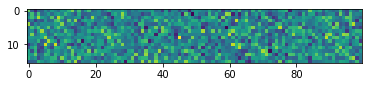

In [5]:
c = cupy.asarray(data[:, 0, :100])
print(c.shape)
plt.imshow(c.get())

In [6]:
c = cupy.asarray(data[:, 0, :])

In [16]:
# dict(data.attrs)

In [8]:
cmax = cupy.amax(c).item()
cmin = cupy.amin(c).item()
cmin, cmax

(6815.15966796875, 5737905664.0)

In [9]:
norm = (c[:, :10000000] - cmin) / (cmax - cmin)

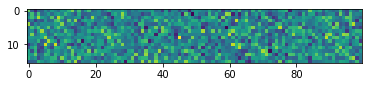

In [10]:
plt.imshow(norm[:, :100].get())

In [11]:
norm[0]

array([1.4659731e-06, 7.9528195e-07, 5.2919120e-07, ..., 2.9917176e-06,
       2.8984457e-06, 3.0688832e-06], dtype=float32)

In [12]:
inorm = (norm * 100).astype(int)

In [13]:
inorm[0]

array([0, 0, 0, ..., 0, 0, 0])

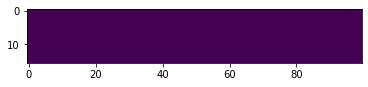

In [14]:
plt.imshow(inorm[:, :100].get())

In [15]:
nz = cupy.nonzero(cupy.amax(inorm, axis=0))[0]
nz

array([ 524288, 1572864, 2621440, 3670016, 4718592, 5767168, 6815744,
       7864320, 8912896, 9961472])

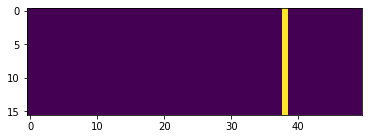

In [17]:
plt.imshow(c[:, 524250:524300].get())